In [8]:
import numpy as np
from sklearn.datasets import load_sample_image
import tensorflow as tf


In [5]:
#load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

In [6]:
#Create 2 filters

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 #vertical line
filters[3, :, :, 1] = 1 #horizontal line

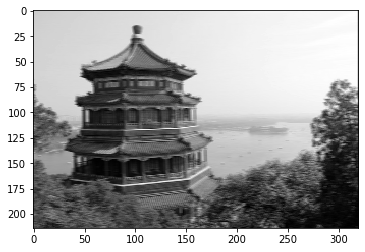

In [9]:
import matplotlib.pyplot as plt
#Create a graph with input X plus a convolutional layer appling the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})
    
plt.imshow(output[0, :, :, 1], cmap="gray") 
plt.show()

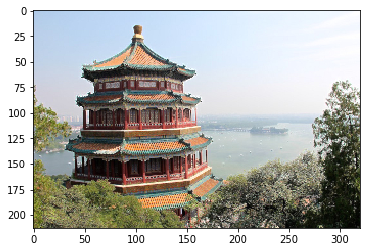

In [10]:
#Implement max pooling

max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    
plt.imshow(output[0].astype(np.uint8))
plt.show()